#  Import Libraries & Load Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("TCS.NS.csv")
df

,Date,Tata Open,Tata High,Tata Low,Tata Close,Tata Adj Close,Tata Volume,Unnamed: 7
0,3/8/2023,3364.000000,3396.000000,3330.850098,3390.399902,3390.399902,1844590,NaN
1,3/6/2023,3361.899902,3404.949951,3359.000000,3371.850098,3371.850098,1334132,NaN
2,3/3/2023,3354.000000,3358.000000,3331.100098,3342.149902,3342.149902,1043190,NaN
3,3/2/2023,3361.000000,3369.899902,3318.000000,3321.449951,3321.449951,1556538,NaN
4,3/1/2023,3323.000000,3389.000000,3315.000000,3385.699951,3385.699951,1669307,NaN
...,...,...,...,...,...,...,...,...
1231,3/15/2018,1447.500000,1451.275024,1427.800049,1434.849976,1287.602783,2348906,NaN
1232,3/14/2018,1446.474976,1461.525024,1437.525024,1443.449951,1295.320190,3668668,NaN
1233,3/13/2018,1462.449951,1469.849976,1436.000000,1443.400024,1295.275391,88067154,NaN
1234,3/12/2018,1521.500000,1541.949951,1517.750000,1526.074951,1369.465820,2091340,NaN


# Basic EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1236 non-null   object 
 1   Tata Open       1236 non-null   float64
 2   Tata High       1236 non-null   float64
 3   Tata Low        1236 non-null   float64
 4   Tata Close      1236 non-null   float64
 5   Tata Adj Close  1236 non-null   float64
 6   Tata Volume     1236 non-null   int64  
 7   Unnamed: 7      0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 77.4+ KB


In [4]:
df.shape

(1236, 8)

In [5]:
df.dtypes

Date               object
Tata Open         float64
Tata High         float64
Tata Low          float64
Tata Close        float64
Tata Adj Close    float64
Tata Volume         int64
Unnamed: 7        float64
dtype: object

In [6]:
df.describe()

,Tata Open,Tata High,Tata Low,Tata Close,Tata Adj Close,Tata Volume,Unnamed: 7
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03,0.0
mean,2655.670508,2682.157722,2626.782753,2654.277770,2525.914239,3.084762e+06,NaN
std,694.199318,697.373485,689.648040,693.676517,719.185149,3.080655e+06,NaN
min,1401.000000,1413.699951,1390.775024,1408.500000,1263.956909,1.445300e+05,NaN
25%,2050.825074,2071.012574,2024.500000,2046.225006,1883.964905,1.873852e+06,NaN
50%,2351.974976,2415.224976,2328.599976,2361.150024,2248.520507,2.558724e+06,NaN
75%,3290.025024,3321.000000,3257.299926,3287.887574,3194.607544,3.537774e+06,NaN
max,4033.949951,4043.000000,3980.000000,4019.149902,3885.789551,8.806715e+07,NaN


# Missing Values

In [7]:
df.isnull().sum()

Date                 0
Tata Open            0
Tata High            0
Tata Low             0
Tata Close           0
Tata Adj Close       0
Tata Volume          0
Unnamed: 7        1236
dtype: int64

# Handled Missing Values By Dropping the Column

In [8]:
df.drop(columns=['Unnamed: 7'], inplace=True)

In [9]:
df.isnull().sum()

Date              0
Tata Open         0
Tata High         0
Tata Low          0
Tata Close        0
Tata Adj Close    0
Tata Volume       0
dtype: int64

# Checking For Duplicate Rows

In [10]:
duplicate_rows = df[df.duplicated()]
print(f"Total duplicate rows: {duplicate_rows.shape[0]}")


Total duplicate rows: 0


In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


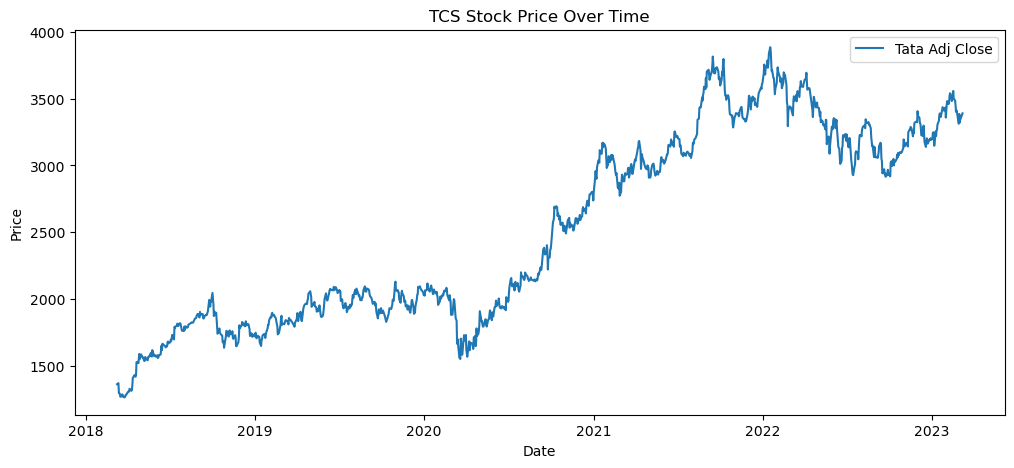

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(df['Tata Adj Close'], label='Tata Adj Close')
plt.title('TCS Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Check missing values

In [13]:
# Check missing values
print(df.isnull().sum())

# Fill forward missing values (if time-series)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


Tata Open         0
Tata High         0
Tata Low          0
Tata Close        0
Tata Adj Close    0
Tata Volume       0
dtype: int64


C:\Users\ponna\AppData\Local\Temp\ipykernel_20932\3780751751.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\ponna\AppData\Local\Temp\ipykernel_20932\3780751751.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


# Outlier Detection (Z-score method or IQR)

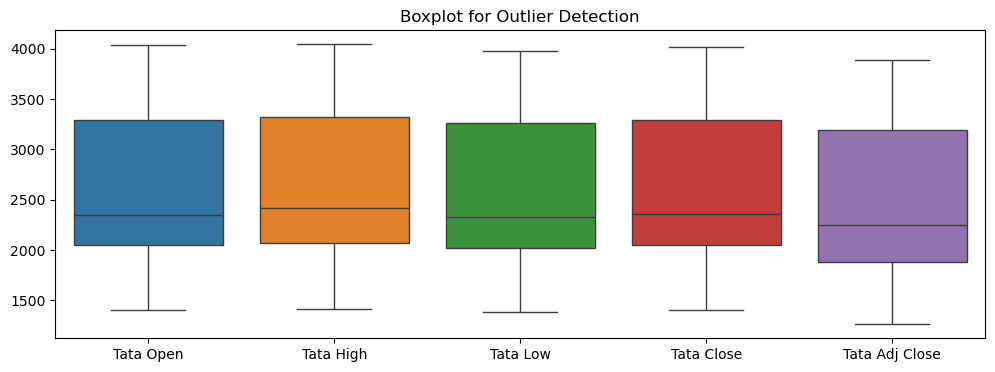

In [14]:
# Z-score method
from scipy.stats import zscore
import numpy as np
import seaborn as sns
z_scores = np.abs(zscore(df[['Tata Open', 'Tata High', 'Tata Low', 'Tata Close', 'Tata Adj Close', 'Tata Volume']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Optional: visualize with boxplot
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['Tata Open', 'Tata High', 'Tata Low', 'Tata Close', 'Tata Adj Close']])
plt.title('Boxplot for Outlier Detection')
plt.show()


# Feature Engineering

In [15]:
# Daily return (%)
df['Daily Return %'] = df['Tata Adj Close'].pct_change() * 100

# Moving Averages
df['MA_10'] = df['Tata Adj Close'].rolling(window=10).mean()
df['MA_30'] = df['Tata Adj Close'].rolling(window=30).mean()

# Volatility (Rolling Std Dev)
df['Volatility_10'] = df['Tata Adj Close'].rolling(window=10).std()

# Drop NA rows generated by rolling
df.dropna(inplace=True)


In [16]:
df

,Tata Open,Tata High,Tata Low,Tata Close,Tata Adj Close,Tata Volume,Daily Return %,MA_10,MA_30,Volatility_10
Date,,,,,,,,,,
2023-01-24,3425.000000,3451.949951,3417.300049,3436.300049,3436.300049,1387863,0.190977,3435.300000,3437.473340,36.591812
2023-01-23,3388.000000,3419.000000,3355.600098,3414.899902,3414.899902,1067916,-0.622767,3429.534985,3438.290007,34.555736
2023-01-20,3365.000000,3394.649902,3355.600098,3363.100098,3363.100098,1529349,-1.516876,3419.850000,3437.998340,38.438154
2023-01-19,3380.000000,3387.000000,3361.000000,3373.100098,3373.100098,1585044,0.297345,3408.930005,3439.030013,33.977945
2023-01-18,3380.000000,3408.949951,3372.250000,3390.000000,3390.000000,2421189,0.501020,3401.890015,3441.315015,29.067138
...,...,...,...,...,...,...,...,...,...,...
2018-03-15,1447.500000,1451.275024,1427.800049,1434.849976,1287.602783,2348906,1.557146,1274.785925,1369.732263,8.561840
2018-03-14,1446.474976,1461.525024,1437.525024,1443.449951,1295.320190,3668668,0.599362,1276.479761,1361.281209,10.748543
2018-03-13,1462.449951,1469.849976,1436.000000,1443.400024,1295.275391,88067154,-0.003459,1278.234143,1351.522974,12.295937


# Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Tata Open', 'Tata High', 'Tata Low', 'Tata Close', 'Tata Adj Close', 'Tata Volume', 
                                           'Daily Return %', 'MA_10', 'MA_30', 'Volatility_10']])

scaled_df = pd.DataFrame(scaled_features, columns=[
    'Tata Open', 'Tata High', 'Tata Low', 'Tata Close', 'Tata Adj Close', 'Tata Volume', 
    'Daily Return %', 'MA_10', 'MA_30', 'Volatility_10'],
    index=df.index
)


In [18]:
scaled_df

,Tata Open,Tata High,Tata Low,Tata Close,Tata Adj Close,Tata Volume,Daily Return %,MA_10,MA_30,Volatility_10
Date,,,,,,,,,,
2023-01-24,0.768720,0.775206,0.782676,0.776741,0.828559,0.014141,0.473044,0.860996,0.887959,0.179433
2023-01-23,0.754667,0.762674,0.758847,0.768544,0.820397,0.010502,0.430991,0.858699,0.888305,0.167622
2023-01-20,0.745931,0.753413,0.758847,0.748702,0.800640,0.015750,0.384785,0.854839,0.888181,0.190144
2023-01-19,0.751628,0.750504,0.760932,0.752533,0.804454,0.016384,0.478540,0.850487,0.888618,0.164270
2023-01-18,0.751628,0.758852,0.765277,0.759006,0.810900,0.025894,0.489066,0.847682,0.889585,0.135783
...,...,...,...,...,...,...,...,...,...,...
2018-03-15,0.017661,0.014291,0.014300,0.010093,0.009019,0.025072,0.543644,0.000000,0.012582,0.016832
2018-03-14,0.017271,0.018189,0.018056,0.013387,0.011962,0.040082,0.494148,0.000675,0.009004,0.029517
2018-03-13,0.023339,0.021356,0.017467,0.013368,0.011945,1.000000,0.462995,0.001374,0.004873,0.038493


# Train-Test Split (Time Series Style)

In [19]:
train_size = int(len(scaled_df) * 0.8)
train, test = scaled_df[:train_size], scaled_df[train_size:]


# Model Building (LSTM for Time Series Forecasting)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 4])  # target = Adj Close
    return np.array(X), np.array(y)

seq_length = 30
X_train, y_train = create_sequences(train.values, seq_length)
X_test, y_test = create_sequences(test.values, seq_length)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(seq_length, X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


C:\Users\ponna\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.3103 - val_loss: 0.0014
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0059 - val_loss: 0.0013
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0015 - val_loss: 9.2854e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - val_loss: 9.7674e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.2181e-04 - val_loss: 9.5583e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 8.4738e-04 - val_loss: 9.7629e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.7621e-04 - val_loss: 9.2325e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.4459e-04 - val_loss: 9.2323e-04
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.8140e-04 - val_loss: 9.5841e-04
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 6.9380e-04 - val_loss: 0.0010
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 6.7091e-04 - val_loss: 9.1600e-04
Epo

# Evaluation & Plotting

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


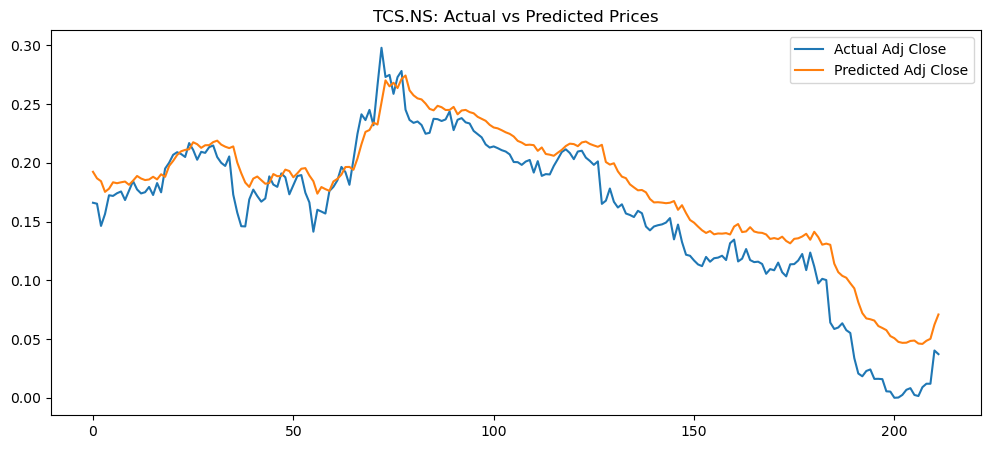

In [21]:
preds = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(y_test, label='Actual Adj Close')
plt.plot(preds, label='Predicted Adj Close')
plt.title('TCS.NS: Actual vs Predicted Prices')
plt.legend()
plt.show()


# Evaluation Metrics for Time Series Forecasting

In [22]:
def evaluate_forecast(y_true, y_pred):
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import numpy as np

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"MAE  : {mae:.2f}")
    print(f"MSE  : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.4f}")
# Example usage
evaluate_forecast(y_test, preds)



MAE  : 0.02
MSE  : 0.00
RMSE : 0.03
R²   : 0.8577


C:\Users\ponna\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Final Dataset

In [23]:

df.to_csv("final_stock_dataset.csv", index=False)

# Forecasted VS Actual Dataset

In [24]:
start_index = len(df) - len(y_test)
forecast_dates = df.index[start_index:]

forecast_df = pd.DataFrame({
    'Date': forecast_dates[:len(y_test)],
    'Actual': y_test.flatten(),
    'Forecasted': preds.flatten()
})

forecast_df['Error'] = abs(forecast_df['Actual'] - forecast_df['Forecasted'])

# Save to CSV for upload
forecast_df.to_csv('forecast_vs_actual.csv', index=False)


# Converting CSV file to Excel.

In [25]:
import pandas as pd

csv_file = "forecast_vs_actual.csv"
df = pd.read_csv(csv_file)

excel_file = "forecast_vs_actual.xlsx"
df.to_excel(excel_file, index=False)

print("Successfully converted CSV to Excel:", excel_file)


Successfully converted CSV to Excel: forecast_vs_actual.xlsx
